In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import warnings
import math
from scipy.stats import norm


warnings.filterwarnings('ignore')

### Этапы проверки статистических гипотез

1. Выдвижение основной гипотезы $( H_0 )$ и альтернативной гипотезы $( H_1 )$.
2. Выбор уровня значимости $( \alpha )$, на котором будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода. Фиксация $(\beta )$ - вероятности ошибки второго рода.
3. Расчет необходимого размера выборки исходя из $\alpha$, $\beta$, дисперсии данных и величины ожидаемого эффекта ($\delta$).
4. Построение критической области.
5. Расчет статистики критерия.
7. По попаданию или непопаданию значения статистики в критическую область делается вывод об отвержении (или неотвержении) нулевой гипотезы на выбранном уровне значимости.

### T-test

Рассматриваем пилотную выборку $ X = (X_1, X_2,...,X_n) $ и контрольную $ Y = (Y_1, Y_2,...,Y_m) $.


Нулевая гипотеза:
- $H_0: E(X) = E(Y)$

Альтернативная гипотеза:
- Двусторонняя: Средние значения двух групп не равны.
 - $ H_1 : E(X) \neq E(Y) $

- Левосторонняя: Среднее первой группы меньше среднего второй группы.
  - $ H_1 : E(X) < E(Y) $

- Правосторонняя: Среднее первой группы больше среднего второй группы.
  - $ H_1 : E(X) > E(Y) $



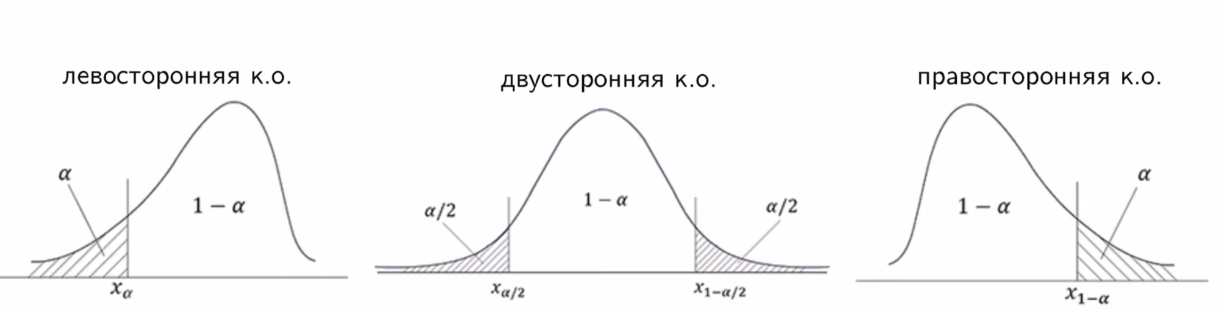

#### Средние выборок

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i, \quad \bar{Y} = \frac{1}{m} \sum_{i=1}^{m} Y_i
$$

#### Оценки дисперсий

$$
S_X^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2, \quad S_Y^2 = \frac{1}{m - 1} \sum_{i=1}^{m} (Y_i - \bar{Y})^2
$$

#### Статистика теста

$$
t(X^n, Y^n) = \frac{\bar{Y} - \bar{X}}{\sqrt{\frac{S_X^2}{n} + \frac{S_Y^2}{m}}} \approx St(\nu)
$$

<!-- #### Степени свободы:

$$
\nu = \frac{\left(\frac{S_X^2}{n_1} + \frac{S_Y^2}{n_2}\right)^2}{\frac{S_X^4}{n_1^2 (n_1 - 1)} + \frac{S_Y^4}{n_2^2 (n_2 - 1)}}
$$ -->


### Определение размера выборки

$$ n = \frac{\left[ \Phi^{-1} \left( 1-\dfrac{\alpha}{2} \right) + \Phi^{-1} \left( 1-\beta \right) \right]^2 (S_X^2 + S_Y^2)}{\delta^2}$$

$\Phi^{-1}(x)$ – это обратная функция распределения нормального распределения

## p-value
Это вероятность получить значение статистики как в эксперименте или более экстремальное при условии того, что нулевая гипотеза верна.

$$ p_{value} = \mathbb{P}(|T| > t|H_0) $$

Давайте рассмотрим пример использования t-теста.

Сгенерируем данные для пилотной и контрольной выборки. Они будут иметь равное математическое ожидание и дисперсию

In [5]:
alpha = 0.05

In [2]:
np.random.seed(23)
data_pilot = np.random.normal(loc=10, scale=1, size=1000)
data_control = np.random.normal(loc=10, scale=1, size=1000)

Посмотрим на распределения выборок.

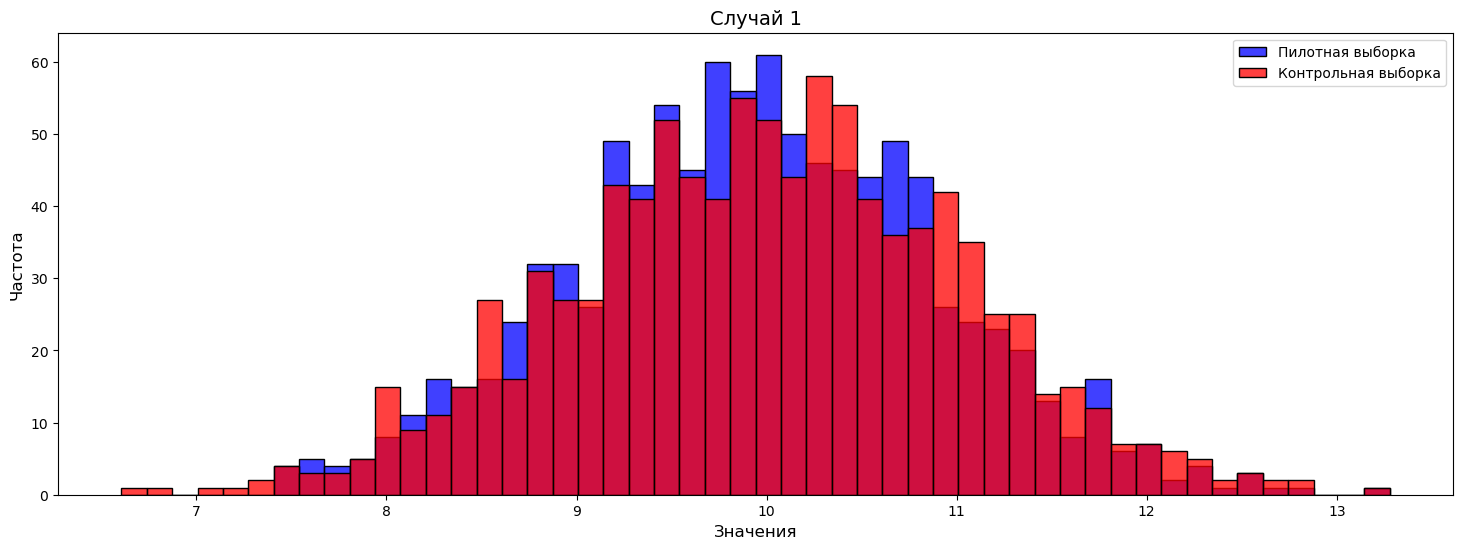

In [3]:
plt.figure(figsize=(18, 6))

all_samples = np.concatenate((data_pilot, data_control))
bins = np.histogram_bin_edges(all_samples, bins=50)

sns.histplot(data_pilot, color='blue', bins=bins, label='Пилотная выборка')
sns.histplot(data_control, color='red', bins=bins, label='Контрольная выборка')

plt.title('Случай 1', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.show()

Рассчитаем t-статистику и p-value.

In [4]:
t_stat1, p_value1 = stats.ttest_ind(data_pilot, data_control, equal_var=False, alternative='two-sided')
print("Случай 1 (без значимого различия):")
print(f"t-статистика = {t_stat1:.3f}, p-value = {p_value1:.3f}")

Случай 1 (без значимого различия):
t-статистика = -1.161, p-value = 0.246


Теперь рассмотрим случай, когда математические ожидания выборок отличаются.

In [18]:
np.random.seed(23)
data_pilot_new = np.random.normal(loc=9.92, scale=1, size=1000)

Снова построим распределение выборок.

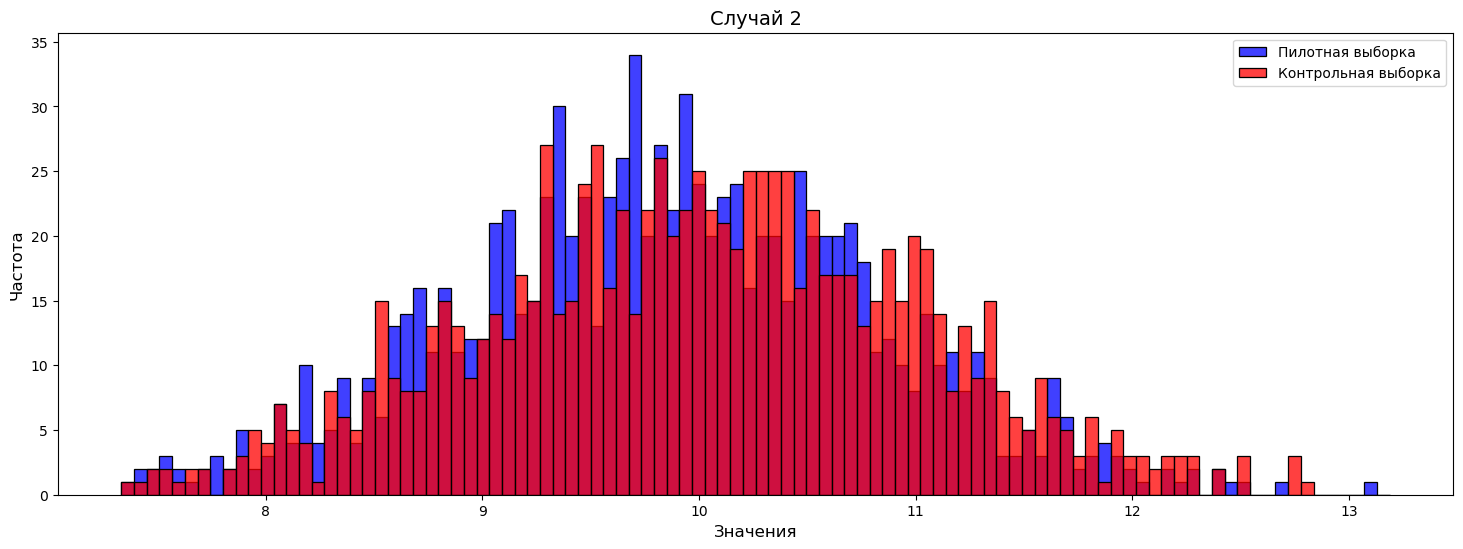

In [19]:
plt.figure(figsize=(18, 6))

all_samples = np.concatenate((data_pilot, data_pilot_new))
bins = np.histogram_bin_edges(all_samples, bins=100)

sns.histplot(data_pilot_new, color='blue', bins=bins, label='Пилотная выборка')
sns.histplot(data_control, color='red', bins=bins, label='Контрольная выборка')

plt.title('Случай 2', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.show()

t-статистика и p-value

In [20]:
t_stat2, p_value2 = stats.ttest_ind(data_pilot, data_pilot_new)
print("Случай 2 (значимое различие):")
print(f"t-статистика = {t_stat2:.3f}, p-value = {p_value2:.3f}")

Случай 2 (значимое различие):
t-статистика = 1.859, p-value = 0.063


### Как проверить корректность cтатистического теста?

Полный ответ можно найти в [статье на хабре](https://habr.com/ru/companies/X5Tech/articles/706388/)

Краткий ответ - чтобы получить свидетельство в пользу корректности статистического теста нужно на основе исторических данных построить эмпирическую функцию распределения p-value при условии, что нулевая гипотеза верна. В этом случае эмпирическое распределение должно совпасть с равномерным
<!-- - эффект есть, нулевая гипотеза неверна: в этом случае распределение должно быть выпуклым вверх по отношению к равномерному распределению -->

In [21]:
np.random.seed(42)

group_size = 1000
mu = 0
std = 1

values = np.random.normal(mu, std, group_size * 2)

def run_synthetic_experiments(values, group_size, effect=0, n_iter=1000):
    pvalues = []
    for _ in range(n_iter):
        a, b = np.random.choice(values, size=(2, group_size,), replace=True)
        pvalue = stats.ttest_ind(a, b).pvalue
        pvalues.append(pvalue)
    return np.array(pvalues)

pvalues_aa = run_synthetic_experiments(values=values, group_size=group_size)

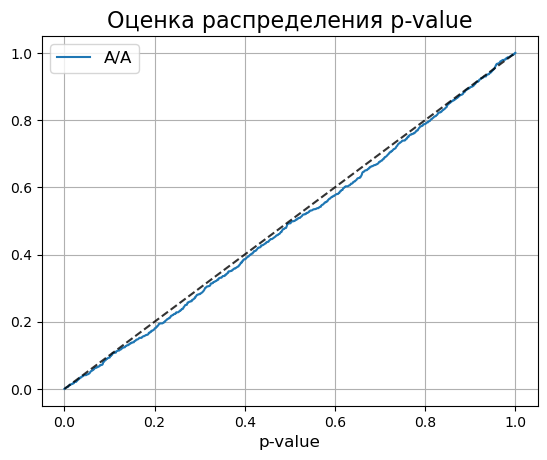

In [22]:
def plot_pvalue_distribution(pvalues_aa, alpha=0.05):
    """Рисует графики распределения p-value."""

    X = np.linspace(0, 1, 1000)
    Y_aa = [np.mean(pvalues_aa < x) for x in X]
    # Y_ab = [np.mean(pvalues_ab < x) for x in X]

    plt.plot(X, Y_aa, label='A/A')
    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)

    plt.title('Оценка распределения p-value', size=16)
    plt.xlabel('p-value', size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

plot_pvalue_distribution(pvalues_aa)

Действительно, эмпирическое распределение получилось равномерным.

Посмотрим, что произойдет с эмпирическими распределениями, если добавить зависимость между данными. Теперь будем брать 3 совпадающих значения для каждого обЪекта.

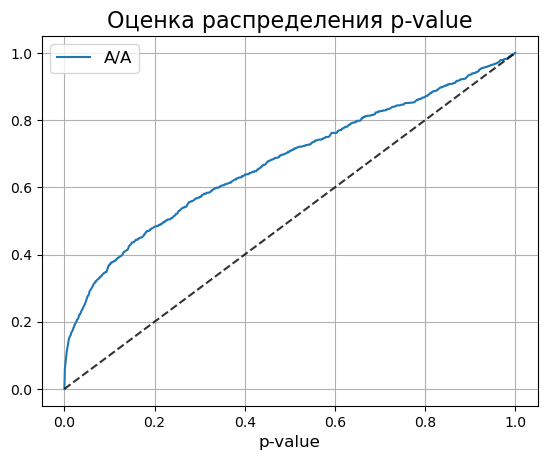

In [23]:
def run_synthetic_experiments_2(values, group_size, effect=0, n_iter=1000):
    pvalues = []
    for _ in range(n_iter):
        a, b = np.random.choice(values, size=(2, group_size,), replace=True)
        a = np.hstack((a, a, a))
        b = np.hstack((b, b, b))
        pvalue = stats.ttest_ind(a, b).pvalue
        pvalues.append(pvalue)
    return np.array(pvalues)

pvalues_aa = run_synthetic_experiments_2(values=values, group_size=group_size)
plot_pvalue_distribution(pvalues_aa)

Как видим, теперь эмпирическое распределение p-value неравномерное, а значит статистический тест работает некорректно.

# Рассмотрим популярные заблуждения о Т тесте

<!-- #  __1. Для использования т-теста требуется нормальное распределение данных - заблуждение.__

На самом деле требуется чтобы:
- Выборки X и Y были независимыми, то есть наблюдения внутри каждой выборки, а также между выборками, являлись независимыми
- Числитель в формуле т-статистики имел нормальное распределение
- Знаменатель в формуле т-статистики имел хи-квадрат распределение
- Числитель и знаменатель были независимы друг от друга. (**Парадоксально, но факт!**)  -->


#  __1. Для использования Т-теста требуется нормальное распределение данных - заблуждение.__



$$
t = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{S_X^2}{n} + \frac{S_Y^2}{m}}}
$$


На самом деле требуется, чтобы:

- Выборки X и Y были независимыми, то есть наблюдения внутри каждой выборки, а также между выборками, являлись независимыми

- Числитель и знаменатель были независимы друг от друга.

- $\bar{X} - \bar{Y} \sim N(0, \sigma^2)$

- $\frac{S_p^2(n+m-2)}{\sigma^2} \sim \chi^2(n+m-2)$, где $S_p^2 = \frac{S_X^2(n-1) + S_Y^2(m-1)}{n+m-2}$




где:

- $\bar{X}$ и $\bar{Y}$ — средние значения выборок X и Y соответственно,
- $S_X^2$ и $S_Y^2$ — дисперсии выборок X и Y,
- $n$ и $m$ — размеры выборок X и Y.


Хотя и для малых размеров выборок данные требования выполняются только для нормального распределения, при б**о**льших размерах выборок это верно и для более широкого класса распределений.

In [24]:
# функция для расчета числителя и знаменителя
def calculate_t_statistics(distribution, sample_size, num_iters=10000, seed=2000):
    np.random.seed(seed)
    t_numerators = []
    t_denominators_func = []

    # генерация данных

    for i in range(num_iters):
        sample1 = distribution(size=sample_size)
        sample2 = distribution(size=sample_size)
        numerator = np.mean(sample1) - np.mean(sample2)

        var_1 = np.var(sample1, ddof=1)
        var_2 = np.var(sample2, ddof=1)

        var_p = ((sample_size - 1) * var_1 + (sample_size - 1) * var_2) / (2 * sample_size - 2)

        denominator_func = ((2 * sample_size - 2) * var_p / 1)

        t_numerators.append(numerator)
        t_denominators_func.append(denominator_func)

    return np.array(t_numerators), np.array(t_denominators_func)

Продемонстрируем, что требования выполнены для нормального распределения при небольших размерах выборки.

In [25]:
sample_size = 100
t_numerators, t_denominators_func = calculate_t_statistics(np.random.normal, sample_size)

Применим тест Шапиро-Уилка, чтобы проверить, подчиняется ли числитель нормальному распределению.

In [26]:
p_value_shapiro = stats.shapiro(t_numerators).pvalue
p_value_shapiro

0.36772656440734863

Гипотезу о нормальности числителя не отвергаем

Применим тест Колмогорова-Смирнова, чтобы проверить, подчиняется ли функция от знаменателя распределению $\chi^2(n+m-1)$

In [28]:
degrees_of_freedom = 2 * sample_size - 2
p_value_kolmogorov = stats.kstest(t_denominators_func, 'chi2', args=(degrees_of_freedom,)).pvalue
p_value_kolmogorov

0.5694447111559412

Чтобы получить некоторые свидетельства относительно независимости числителя и знаменателя, посмотрим на корреляцию.

In [29]:
np.corrcoef(t_numerators, t_denominators_func)[0, 1]

-0.003494284462488928

Видим, что корреляция между числителем и знаменателем отсутствует.

В случае других распределений проверку корректности можно провести, например, с помощью AA-теста на исторических данных, где заведомо нет эффектов. В качестве примера рассмотрим экспоненциальное распределение.

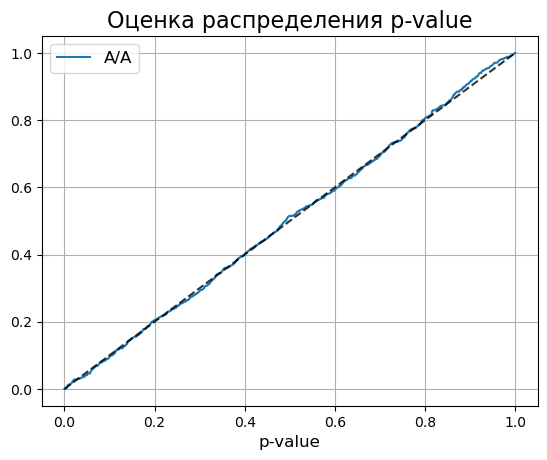

In [34]:
data_exp = np.random.binomial(50, 0.5, size=50000 * 2)
pvalues_aa_exp = run_synthetic_experiments(values=data_exp, group_size=50000)
plot_pvalue_distribution(pvalues_aa_exp)

Как видим, эмпирическое распределение p-value соответствует теоретическому, а значит тест корректен.

 # __2. t-тест не чувствителен к аномалиям - заблуждение.__

  Выбросы могут сильно повлиять на средние значения и стандартные отклонения, что, в свою очередь, влияет на t-статистику и p-значение. Особенно это актуально для небольших выборок.

Проведем моделирование для случаев, когда математические ожидания пилотной и контрольной выборки равны.

Рассмотрим 3 случая:
- выбросов в пилотной группе нет
- выбросы в пилотной группе положительны
- выбросы в пилотной группе как положительны, так и отрицательны

In [39]:
np.random.seed(2008)

group_size = 30
outliers_number = 6

data_pilot = np.random.normal(loc=0, scale=5, size=group_size-outliers_number)
data_control = np.random.normal(loc=0, scale=5, size=group_size)

data_pilot_no_outliers = np.append(data_pilot, np.random.normal(loc=0, scale=5, size=group_size-outliers_number))
data_pilot_positive_outliers = np.append(data_pilot, [100, 110, 120, 130, 140, 150])
data_pilot_all_outliers = np.append(data_pilot, [100, 120, 140, -100, -120, -140])

**Посмотрим, как выглядят наши группы**

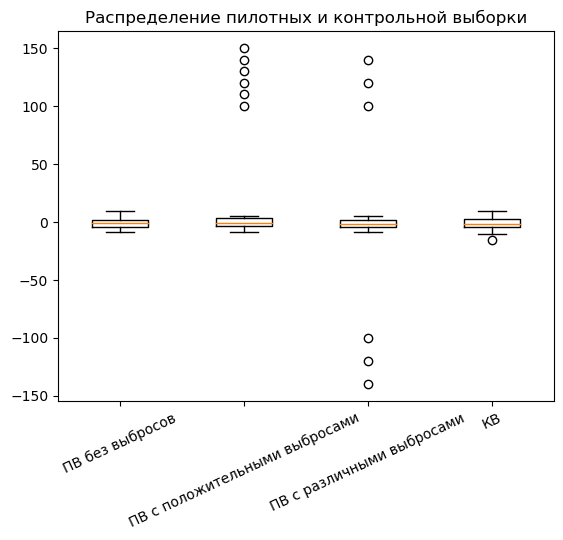

In [40]:
plt.boxplot([data_pilot_no_outliers, data_pilot_positive_outliers, data_pilot_all_outliers, data_control],
            labels=['ПВ без выбросов', 'ПВ c положительными выбросами', 'ПВ с различными выбросами', 'КВ'])
plt.title("Распределение пилотных и контрольной выборки")
plt.xticks(rotation=25)
plt.show()

Здесь ПВ - пилотная выборка, КВ - контрольная выборка

Посмотрим на значения t-статистики и p-value в данных без аномальных значений

In [41]:
t_stat_clean, p_value_clean = stats.ttest_ind(data_pilot, data_control)

In [42]:
print(f"T-статистика без выбросов: {t_stat_clean}, p-value: {p_value_clean}")

T-статистика без выбросов: -0.5759469014899252, p-value: 0.5671355124734674


t-статистика и p-value в данных с аномальными положительными значениями

In [43]:
t_stat_positive_outliers, p_value_positive_outliers = stats.ttest_ind(data_pilot_positive_outliers, data_control)

In [44]:
print(f"T-статистика с положительными выбросами: {t_stat_positive_outliers}, p-value: {p_value_positive_outliers}")

T-статистика с положительными выбросами: 2.565367499161219, p-value: 0.012914720710225435


t-статистика и p-value в данных с аномальными симметричными значениями

In [45]:
t_stat_all_outliers, p_value_all_outliers = stats.ttest_ind(data_pilot_all_outliers, data_control)

In [46]:
print(f"T-статистика с симметричными выбросами: {t_stat_all_outliers}, p-value: {p_value_all_outliers}")

T-статистика с симметричными выбросами: -0.03967111873039319, p-value: 0.9684915690356939


Сгенерируем данные, чтобы посмотреть как t-статистика и p-value изменяются в зависимости от количества выбросов.

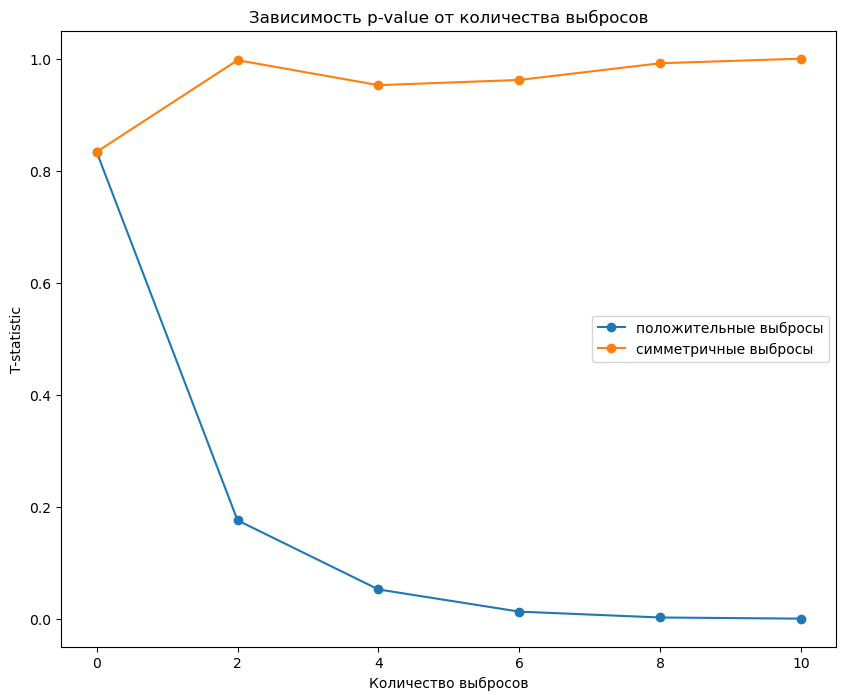

In [47]:
np.random.seed(2003)

max_outliers = 10

pos_outliers = [100] * max_outliers
symm_outliers = [100, -100] * (max_outliers // 2)

p_values_pos_outliers = []
p_values_symm_outliers = []

outliers_number_list = list(range(0, max_outliers+1, 2))
for outliers_number in outliers_number_list:
    # добавляем выбросы
    data_pilot_pos_outliers_cur = np.append(data_pilot_no_outliers[:group_size-outliers_number], pos_outliers[:outliers_number])
    data_pilot_symm_outliers_cur = np.append(data_pilot_no_outliers[:group_size-outliers_number], symm_outliers[:outliers_number])

    p_value_pos_outliers = stats.ttest_ind(data_pilot_pos_outliers_cur, data_control).pvalue
    p_value_symm_outliers = stats.ttest_ind(data_pilot_symm_outliers_cur, data_control).pvalue

    p_values_pos_outliers.append(p_value_pos_outliers)
    p_values_symm_outliers.append(p_value_symm_outliers)

plt.figure(figsize=(10, 8))
# plt.subplot(2, 2, 1)
plt.plot(outliers_number_list, p_values_pos_outliers, marker='o', label='положительные выбросы')
plt.title('Зависимость p-value от количества выбросов')
plt.xlabel('Количество выбросов')
plt.ylabel('T-statistic')

# plt.subplot(2, 2, 2)
plt.plot(outliers_number_list, p_values_symm_outliers, marker='o', label='симметричные выбросы')
plt.legend(loc = 'right')
plt.show()

# __3. t-тест предназначен только для малых или больших выборок - заблуждение.__

t-тест можно применять и для больших выборок.
При увеличении размера выборки t-распределение стремится к нормальному распределению. Таким образом, t-тест становится эквивалентен z-тесту.


Для получения свидетельств относительно корректности статистического теста, будем строить график эмпирического распределения p-value в случае истинности нулевой гипотезы: он должен сойтись с теоретическим, т.е. получиться равномерным.

Рассмотрим различные размеры выборок:
- 30
- 3000
- 300000

Проведем 1000 экспериментов для каждого размера выборки

In [62]:
np.random.seed(42)

loc=0
scale=1
sigma=10

data_30 = np.random.normal(loc=loc, scale=scale, size=30 * 2)
data_300 = np.random.normal(loc=loc, scale=scale, size=300 * 2)
data_30000 = np.random.normal(loc=loc, scale=scale, size=30000 * 2)

# data_30 = np.random.uniform(size=30 * 2)
# data_300 = np.random.uniform(size=300 * 2)
# data_30000 = np.random.uniform(size=30000 * 2)

# data_30 = np.random.exponential(scale=scale, size=30 * 2)
# data_300 = np.random.exponential(scale=scale, size=300 * 2)
# data_30000 = np.random.exponential(scale=scale, size=30000 * 2)

# data_30 = np.random.lognormal(sigma=sigma, size=30 * 2)
# data_300 = np.random.lognormal(sigma=sigma, size=300 * 2)
# data_30000 = np.random.lognormal(sigma=sigma, size=30000 * 2)

In [63]:
pvalues_aa_30 = run_synthetic_experiments(values=data_30, group_size=30)
pvalues_aa_300 = run_synthetic_experiments(values=data_300, group_size=300)
pvalues_aa_30000 = run_synthetic_experiments(values=data_30000, group_size=30000)

Посмотрим на получившееся распределение p-value

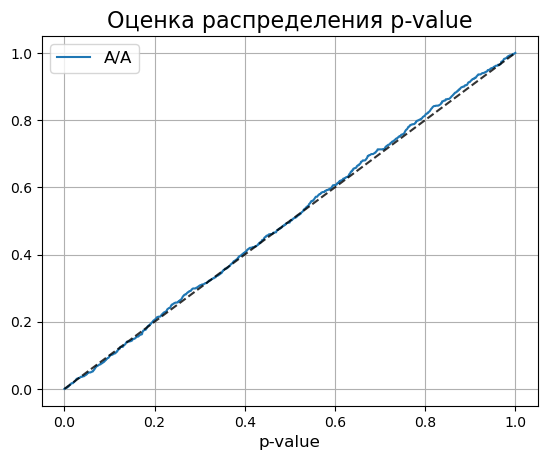

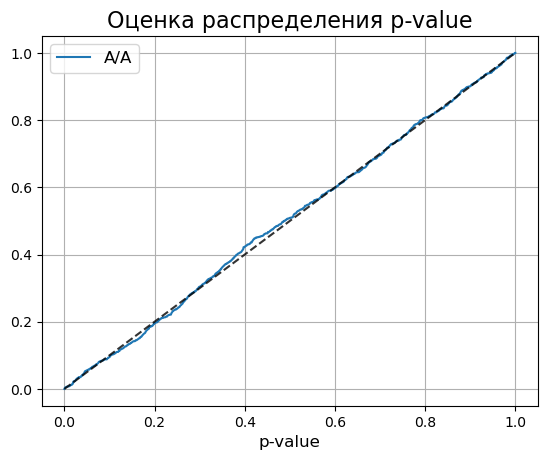

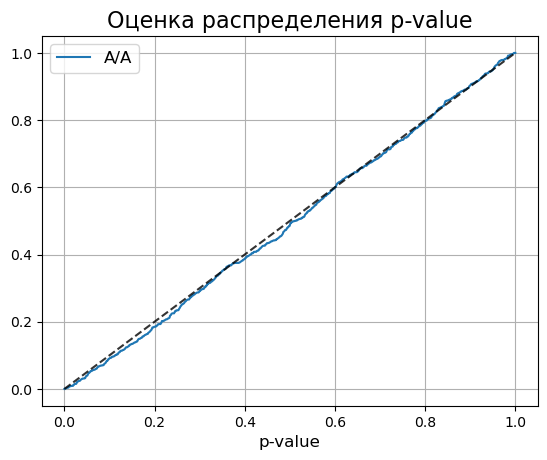

In [64]:
for pvalues in [pvalues_aa_30, pvalues_aa_300, pvalues_aa_30000]:
    plot_pvalue_distribution(pvalues)

Как мы видим, как для малых, так и для больших выборок распределение p-value равномерно

Более того, на самом деле, для больших выборок t-test по сути становится эквивалентен z-test'у. Продемонстрируем это.

In [74]:
np.random.seed(200)

large_pilot_group = np.random.normal(loc=100, scale=15, size=10000)
large_control_group = np.random.normal(loc=100, scale=15, size=10000)

Рассчитаем t-статистику и z-статистику

In [75]:
pop_mean = 100
pop_std = 15

# t-тест для большой выборки
t_stat_large, p_value_large = stats.ttest_ind(large_pilot_group, large_control_group)

# z-тест для большой выборки
z_stat_large, p_value_z_large = ztest(large_pilot_group, large_control_group)

Посмотрим на результаты для большой выборки

In [76]:
print("\nБольшая выборка:")
print(f"t-тест: t-статистика = {t_stat_large}, p-value = {p_value_large}")
print(f"z-тест: z-статистика = {z_stat_large}, p-value = {p_value_z_large}")


Большая выборка:
t-тест: t-статистика = -1.410701605417186, p-value = 0.15834817226993442
z-тест: z-статистика = -1.410701605417186, p-value = 0.1583326174133749


Нулевое распределение в t-test стремится к нулевому распределению в z-test, а именно $St(\nu)$ $\rightarrow$ $N(0, 1)$, $n\rightarrow\infty$

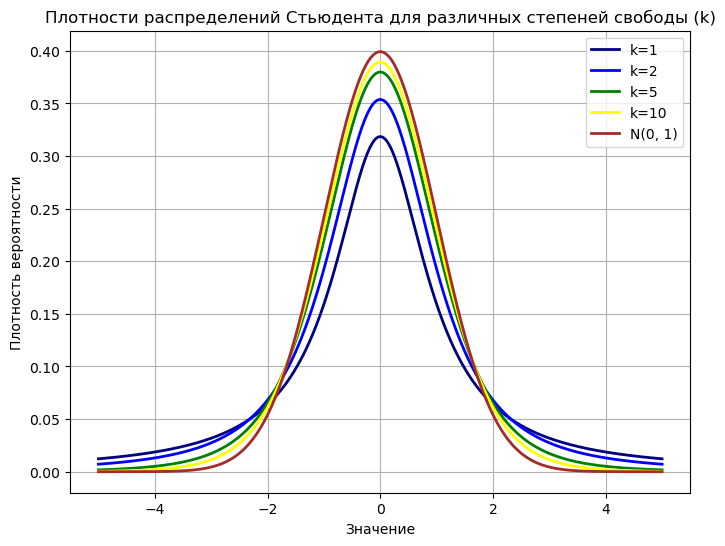

In [77]:
k_values = [1, 2, 5, 10, 10000]
plt.figure(figsize=(8, 6))
x_vals = np.linspace(-5, 5, 1000)
colors = ['navy', 'blue', 'green', 'yellow', 'brown']

for i, k in enumerate(k_values):
    if k == 10000:
        plt.plot(x_vals, stats.norm.pdf(x_vals), label=f'N(0, 1)', color=colors[i], lw=2)
    else:
        plt.plot(x_vals, stats.t.pdf(x_vals, df=k), label=f'k={k}', color=colors[i], lw=2)

plt.title('Плотности распределений Стьюдента для различных степеней свободы (k)')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# __4. p-value указывает на вероятность истинности нулевой гипотезы - заблуждение.__


Напомним, что p-value - это вероятность получить значение статистики как в эксперименте или более экстремальное при условии того, что нулевая гипотеза верна.

$$ p_{value} = \mathbb{P}(|T| > t|H_0) $$

Из определения p-value видно, что оно не дает прямой информации о вероятности истинности или ложности нулевой гипотезы.

Посмотрим на эмпирическую функцию распределения p-value, рассмотрев выборку размера 300 из предыдущего пункта

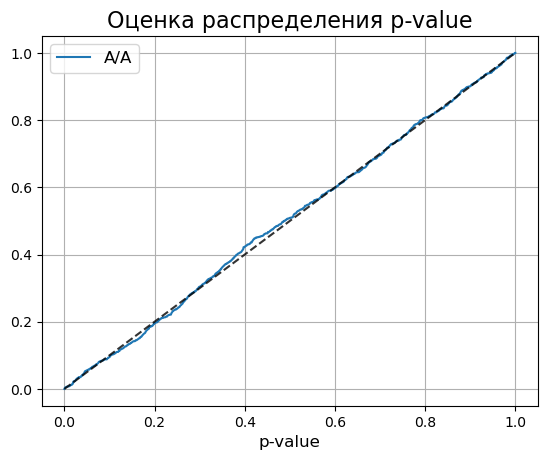

In [78]:
plot_pvalue_distribution(pvalues_aa_300)

Как мы видим, при истинности нулевой гипотезы p-value может равновероятно принимать значения от 0 до 1, так что сделать вывод об истинности нулевой гипотезы только на основе значения p-value мы не можем.

# __5. Если p-value больше уровня значимости, то сравниваемые группы полностью идентичны - заблуждение.__


 p-value больше уровня значимости может означать, что у нас недостаточно данных, чтобы сделать вывод о значимой разнице. Группы все еще могут различаться, но тест не смог обнаружить это.


Рассмотрим случай, когда эффект очень маленький. Мы будем увеличивать размер выборок и смотреть на p-value

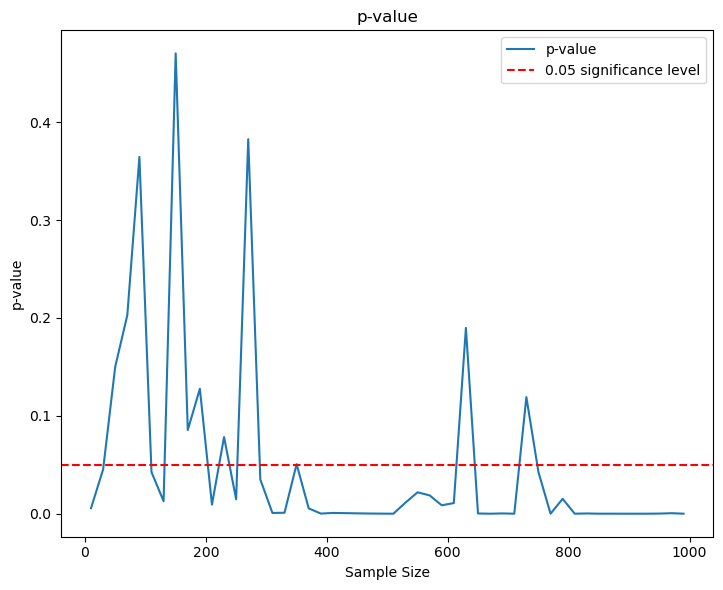

In [79]:
np.random.seed(42)

mu = 0
scale = 1
effect = 0.2
pvalues = []
sample_sizes = list(range(10, 1010, 20))
for group_size in sample_sizes:
    pvalues_group_size = []
    pilot_group = np.random.normal(loc=mu, scale=scale, size=group_size)
    control_group = np.random.normal(loc=mu+effect, scale=scale, size=group_size)
    pvalue = stats.ttest_ind(pilot_group, control_group).pvalue

    pvalue_selected_mean = np.mean(pvalue)

    pvalues.append(pvalue_selected_mean)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, pvalues, label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 significance level')
plt.xlabel('Sample Size')
plt.ylabel('p-value')
plt.title('p-value')
plt.legend()

plt.tight_layout()
plt.show()

Видим, что p-value очень волатильно. Это связано с высокой ошибкой 2 рода, поэтому давайте каждый срез усредним на основе 100 значений p-value.

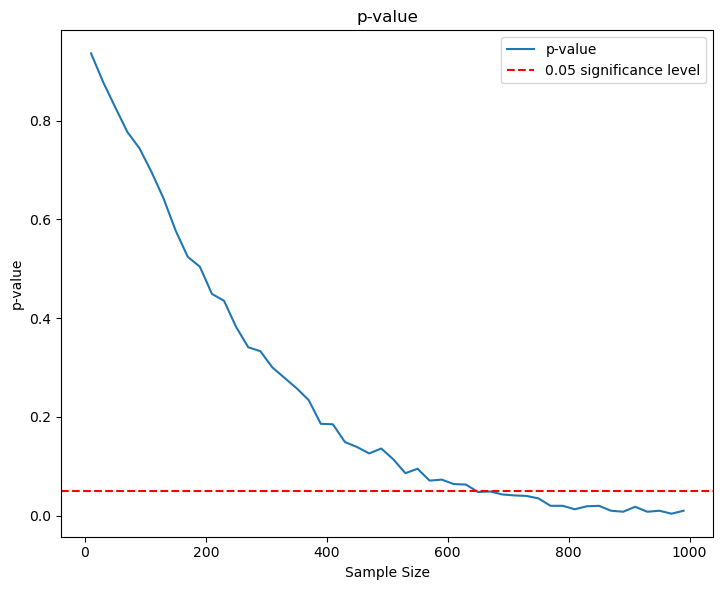

In [94]:
np.random.seed(23)

mu = 0
scale = 1
effect = 0.2
pvalues = []
sample_sizes = list(range(10, 1010, 20))
for sample_size in sample_sizes:
    pvalues_group_size = []
    for _ in range(1000):
        pilot_group = np.random.normal(loc=mu, scale=scale, size=sample_size)
        control_group = np.random.normal(loc=mu+effect, scale=scale, size=sample_size)
        pvalue = stats.ttest_ind(pilot_group, control_group).pvalue
        pvalues_group_size.append(pvalue > alpha)

    pvalue_selected_mean = np.mean(pvalues_group_size)

    pvalues.append(pvalue_selected_mean)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, pvalues, label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 significance level')
plt.xlabel('Sample Size')
plt.ylabel('p-value')
plt.title('p-value')
plt.legend()

plt.tight_layout()
plt.show()

Получили, что при размере группы около 650, p-value принимает значение 0.05.  
Сверим результат с теорией, зафиксировав $\alpha$ на уровне 0.05, а $\beta$ на уровне 0.05.

Напомним формулу для расчета размера выборки:

$$ n = \frac{\left[ \Phi^{-1} \left( 1-\dfrac{\alpha}{2} \right) + \Phi^{-1} \left( 1-\beta \right) \right]^2 (S_X^2 + S_Y^2)}{\delta^2}$$

In [97]:
def calculate_sample_size(alpha, beta, var_x, var_y, eff):

    PHI_alpha = norm.ppf(1 - alpha / 2)
    PHI_beta = norm.ppf(1 - beta)

    n = (PHI_alpha + PHI_beta) ** 2 * (var_x + var_y) / eff ** 2

    return math.ceil(n)

In [98]:
print(calculate_sample_size(alpha=0.05, beta=0.05, var_x=1, var_y=1, eff=0.2))

650


Как и ожидалось, значение размера выборки, рассчитанное теоретически, совпадает со значением, полученным на практике.

### __95% доверительный интервал показывает, что с вероятностью 0.95 истинный параметр лежит в этом интервале - заблуждение.__

 На самом деле доверительный интервал интерпретируется следующим образом: если бы мы провели бесконечное число экспериментов и для каждого вычислили 95%-ный доверительный интервал, то в 95% случаев этот интервал содержал бы истинное значение параметра. Мы не можем утверждать с 95%-ной вероятностью, что конкретный интервал содержит истинное значение параметра, так как параметр либо лежит в интервале, либо не лежит там.

Проведем моделирование для малой выборки размером 30 и большой выборки размером 3000

In [99]:
def make_ci_simulations(sample_size=30, num_simulations=100, true_mean=0, pop_std=15, seed=42):
    np.random.seed(42)
    confidence_intervals = []
    contains_true_mean = []
    for _ in range(num_simulations):
        sample = np.random.normal(loc=true_mean, scale=pop_std, size=sample_size)
        ci_low, ci_high = stats.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=stats.sem(sample))
        confidence_intervals.append((ci_low, ci_high))

        contains_true_mean.append(ci_low <= true_mean <= ci_high)
    return confidence_intervals, contains_true_mean

def plot_ci(confidence_intervals, contains_true_mean, true_mean):
    plt.figure(figsize=(10, 6))

    for i, (ci, contains_true_mean) in enumerate(zip(confidence_intervals, contains_true_mean)):
        if contains_true_mean:
            plt.plot([i+1, i+1], [ci[0], ci[1]], color='blue', lw=1)
        else:
            plt.plot([i+1, i+1], [ci[0], ci[1]], color='red', lw=1)
    plt.axhline(y=true_mean, color='green', linestyle='--', label='Истинное среднее', lw=1)

    plt.title("95% доверительные интервалы")
    plt.xlabel("Эксперимент")
    plt.ylabel("Доверительный интервал")
    plt.legend()
    plt.tight_layout()
    plt.show()

**Зафиксируем параметры эксперимента**

In [100]:
true_mean = 0
pop_std = 15
num_simulations = 100
confidence_level = 0.95

### Выборка размером 30

In [101]:
sample_size=30

In [103]:
confidence_intervals_30, contains_true_mean_30 = make_ci_simulations(
    sample_size=sample_size,
    num_simulations=num_simulations,
    true_mean=true_mean,
    pop_std=pop_std
)

Построим доверительные интервалы.

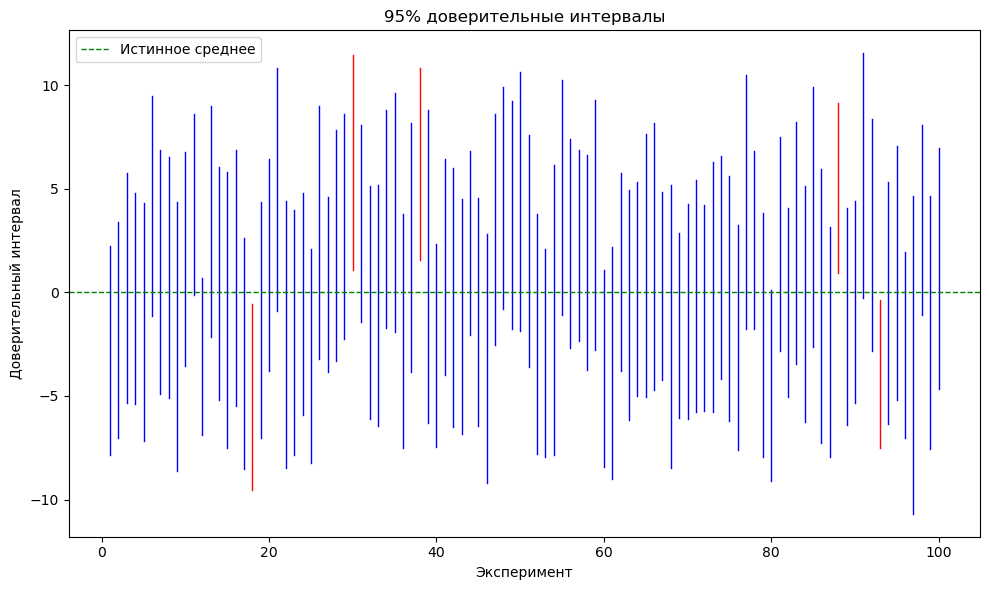

In [104]:
plot_ci(confidence_intervals_30, contains_true_mean_30, true_mean)

### Выборка размером 3000

In [105]:
sample_size=3000

In [106]:
confidence_intervals_3000, contains_true_mean_3000 = make_ci_simulations(
    sample_size=sample_size,
    num_simulations=num_simulations,
    true_mean=true_mean,
    pop_std=pop_std
)

Построим доверительные интервалы.

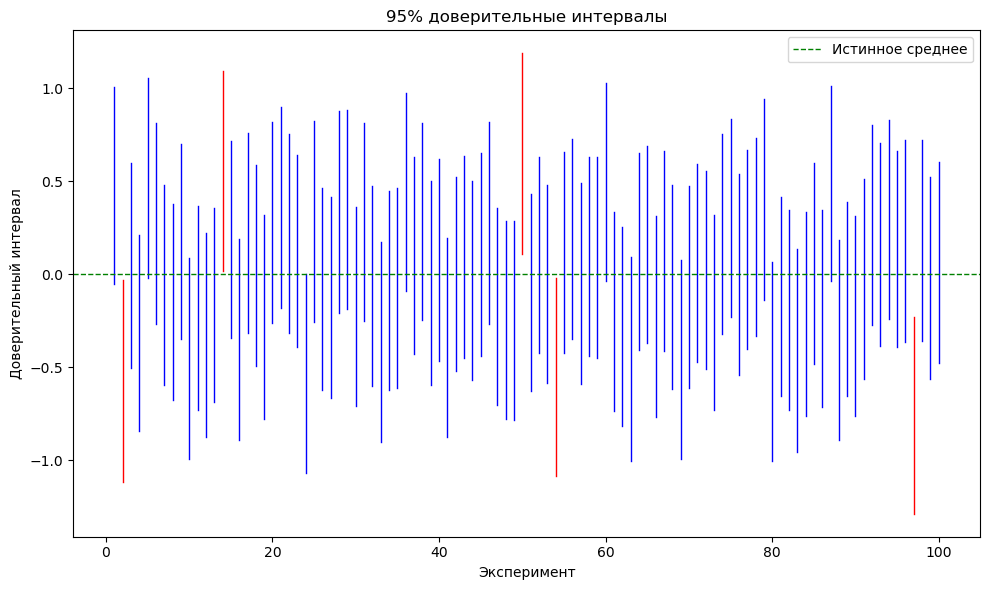

In [107]:
plot_ci(confidence_intervals_3000, contains_true_mean_3000, true_mean)

Получили схожие результаты для выборок разных размеров